In [2]:
import numpy as np
import pandas as pd

# Load data from CSV
file_path = r"E:\UOM\Academic\Semester 5\Pattern Recognition\Assignment 01\Advertising.csv"

df = pd.read_csv(file_path)

print(df.head())

   sample index     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9


X_train shape:  (160, 3)
X_test shape:  (40, 3)
y_train shape:  (160,)
y_test shape:  (40,)


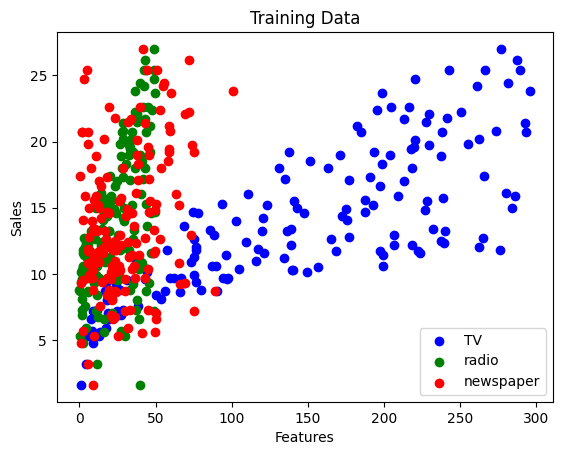

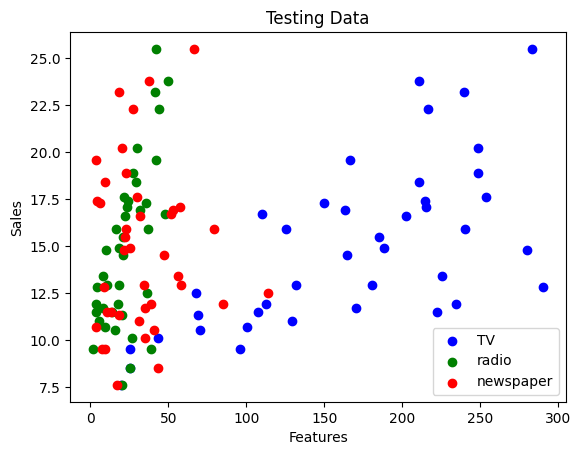

In [3]:
# Split data into training and testing sets (80% training, 20% testing) by using sklearn library
from sklearn.model_selection import train_test_split

# Extract features(X) and target(y) from the dataset
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)


# Visualize training data and testing data
import matplotlib.pyplot as plt

# Visualize training data
plt.scatter(X_train['TV'], y_train, color='blue', label='TV')
plt.scatter(X_train['radio'], y_train, color='green', label='radio')
plt.scatter(X_train['newspaper'], y_train, color='red', label='newspaper')
plt.xlabel('Features')
plt.ylabel('Sales')
plt.title('Training Data')
plt.legend()
plt.show()

# Visualize testing data
plt.scatter(X_test['TV'], y_test, color='blue', label='TV')
plt.scatter(X_test['radio'], y_test, color='green', label='radio')
plt.scatter(X_test['newspaper'], y_test, color='red', label='newspaper')
plt.xlabel('Features')
plt.ylabel('Sales')
plt.title('Testing Data')
plt.legend()
plt.show()



In [4]:
# Train the model using Linear Regression
# Model parameters: x1=TV, x2=radio, x3=newspaper, y=sales
#y = w0 + w1*x1 + w2*x2 + w3*x3

# Import LinearRegression from sklearn
from sklearn.linear_model import LinearRegression

# Create a LinearRegression object
model = LinearRegression()

# Train the model using training data
model.fit(X_train, y_train)

# Print the model parameters
print("Model intercept: ", model.intercept_)
print("Model coefficients: ", model.coef_)


Model intercept:  2.907947020816433
Model coefficients:  [0.0468431  0.17854434 0.00258619]


In [5]:
# Predict the target values using testing data
y_test_pred = model.predict(X_test)

# Print the predicted target values
print("Predicted target values: ", y_test_pred)


Predicted target values:  [21.73577184 16.45693776  7.65993185 17.89202679 18.67730671 23.86271904
 16.33623628 13.45649226  9.177296   17.36056228 14.4677995   9.85697601
 17.26057027 16.71866935 15.09530285 15.58923732 12.45188167 17.27925151
 11.0944114  18.06889853  9.33433055 12.91345761  8.7842804  10.46670654
 11.40303174 15.03104665  9.78479388 19.46028647 18.22954934 17.1958903
 21.60304218 14.71901407 16.29205532 12.36432281 19.98831261 15.37556411
 13.96678297 10.06809496 20.97197274  7.45877832]


In [6]:
import statsmodels.api as sm
# Add a constant column to the feature matrix (required for statsmodels)
X_train_with_const = sm.add_constant(X_train)
X_test_with_const = sm.add_constant(X_test) 

# Fit the Ordinary Least Squares (OLS) model
model_sm = sm.OLS(y_train, X_train_with_const).fit()

# Print the model summary
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     447.7
Date:                Mon, 11 Sep 2023   Prob (F-statistic):           2.12e-76
Time:                        15:44:39   Log-Likelihood:                -315.37
No. Observations:                 160   AIC:                             638.7
Df Residuals:                     156   BIC:                             651.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9079      0.349      8.339      0.0

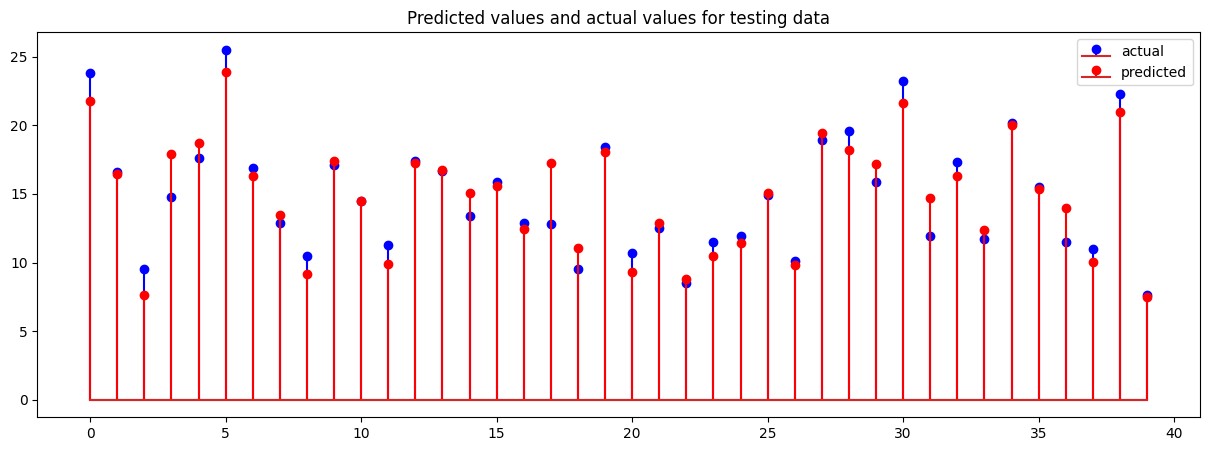

In [7]:
# Plot actual testing values and the model prediction for testing values
#(Actual values are plotted in blue color and the model prediction are plotted in red color)
y_test_pred = model.predict(X_test)

plt.figure(figsize=(15,5))
plt.title("Predicted values and actual values for testing data")
plt.stem(y_test.values, 'b' ,label='actual')
plt.stem(y_test_pred ,'r', label='predicted')
plt.legend( )
plt.show()

In [8]:
# Calculate Residual Sum of Squares (RSS) for training and testing data
RSS_train = np.sum(np.square(y_train - model.predict(X_train)))
RSS_test = np.sum(np.square(y_test - y_test_pred))

print("RSS for training data: ", RSS_train)
print("RSS for testing data: ", RSS_test)


RSS for training data:  482.6928972255484
RSS for testing data:  79.67542207315162


In [9]:
# Calculate Residual Standard Error (RSE) for training and testing data
d = X_train.shape[1] # number of features
n = X_train.shape[0] # number of training samples

RSE_train = np.sqrt(RSS_train/(n-d-1))
RSE_test = np.sqrt(RSS_test/(n-d-1))

print("RSE for training data: ", RSE_train)
print("RSE for testing data: ", RSE_test)

RSE for training data:  1.7590296298315473
RSE for testing data:  0.7146606782832712


In [24]:
# Calculate Mean Squared Error (MSE) for training and testing data
MSE_train = RSS_train/n
MSE_test = RSS_test/n

print("MSE for training data: ", MSE_train)
print("MSE for testing data: ", MSE_test)

MSE for training data:  3.0168306076596774
MSE for testing data:  0.49797138795719764


In [25]:
# Caluclate R^2 statistic for training and testing data
TSS_train = np.sum(np.square(y_train - np.mean(y_train)))
TSS_test = np.sum(np.square(y_test - np.mean(y_test)))

R2_train = 1 - RSS_train/TSS_train
R2_test = 1 - RSS_test/TSS_test

print("R2 for training data: ", R2_train)
print("R2 for testing data: ", R2_test)

R2 for training data:  0.8959372632325174
R2 for testing data:  0.8927605914615384


In [30]:
# Calculate Standard Error (SE) for each feature (w0, TV, radio, newspaper) for training data
SE_w0_train = RSE_train*np.sqrt(1/n + np.square(np.mean(X_train['TV']))/np.sum(np.square(X_train['TV']-np.mean(X_train['TV']))))
SE_w1_train = RSE_train*np.sqrt(1/np.sum(np.square(X_train['TV']-np.mean(X_train['TV']))))
SE_w2_train = RSE_train*np.sqrt(1/np.sum(np.square(X_train['radio']-np.mean(X_train['radio']))))
SE_w3_train = RSE_train*np.sqrt(1/np.sum(np.square(X_train['newspaper']-np.mean(X_train['newspaper']))))

print("for training data:")
print("SE for w0: ", SE_w0_train)
print("SE for w1: ", SE_w1_train)
print("SE for w2: ", SE_w2_train)
print("SE for w3: ", SE_w3_train)

print("")

# Calculate Standard Error (SE) for each feature (w0, TV, radio, newspaper) for testing data
SE_w0_test = RSE_test*np.sqrt(1/n + np.square(np.mean(X_test['TV']))/np.sum(np.square(X_test['TV']-np.mean(X_test['TV']))))
SE_w1_test = RSE_test*np.sqrt(1/np.sum(np.square(X_test['TV']-np.mean(X_test['TV']))))
SE_w2_test = RSE_test*np.sqrt(1/np.sum(np.square(X_test['radio']-np.mean(X_test['radio']))))
SE_w3_test = RSE_test*np.sqrt(1/np.sum(np.square(X_test['newspaper']-np.mean(X_test['newspaper']))))

print("for testing data:")
print("SE for w0: ", SE_w0_test)
print("SE for w1: ", SE_w1_test)
print("SE for w2: ", SE_w2_test)
print("SE for w3: ", SE_w3_test)


for training data:
SE for w0:  0.2657589245679816
SE for w1:  0.0015915882844085901
SE for w2:  0.009153205539098987
SE for w3:  0.006616785718567478

for testing data:
SE for w0:  0.25523244755384117
SE for w1:  0.001499017049088985
SE for w2:  0.008583483986745346
SE for w3:  0.004669375784666661


In [31]:
# t-statistic for each feature (w0, TV, radio, newspaper) for training data
t_w0_train = model.intercept_/SE_w0_train
t_w1_train = model.coef_[0]/SE_w1_train
t_w2_train = model.coef_[1]/SE_w2_train
t_w3_train = model.coef_[2]/SE_w3_train

print("for training data:")
print("t-statistic for w0: ", t_w0_train)
print("t-statistic for w1: ", t_w1_train)
print("t-statistic for w2: ", t_w2_train)
print("t-statistic for w3: ", t_w3_train)

print("")
# t-statistic for each feature (w0, TV, radio, newspaper) for testing data
t_w0_test = model.intercept_/SE_w0_test
t_w1_test = model.coef_[0]/SE_w1_test
t_w2_test = model.coef_[1]/SE_w2_test
t_w3_test = model.coef_[2]/SE_w3_test

print("for testing data:")
print("t-statistic for w0: ", t_w0_test)
print("t-statistic for w1: ", t_w1_test)
print("t-statistic for w2: ", t_w2_test)
print("t-statistic for w3: ", t_w3_test)



for training data:
t-statistic for w0:  10.942048420551066
t-statistic for w1:  29.431671265660643
t-statistic for w2:  19.506209387105205
t-statistic for w3:  0.3908523267924272

for testing data:
t-statistic for w0:  11.393328115944204
t-statistic for w1:  31.24921307963703
t-statistic for w2:  20.800917679183065
t-statistic for w3:  0.5538612039925214


In [32]:
# p-value for each feature (w0, TV, radio, newspaper) for training data
from scipy.stats import t

p_w0_train = (1 - t.cdf(np.abs(t_w0_train), n-d-1))*2
p_w1_train = (1 - t.cdf(np.abs(t_w1_train), n-d-1))*2
p_w2_train = (1 - t.cdf(np.abs(t_w2_train), n-d-1))*2
p_w3_train = (1 - t.cdf(np.abs(t_w3_train), n-d-1))*2

print("for training data:")
print("p-value for w0: ", p_w0_train)
print("p-value for w1: ", p_w1_train)
print("p-value for w2: ", p_w2_train)
print("p-value for w3: ", p_w3_train)

print("")
# p-value for each feature (w0, TV, radio, newspaper) for testing data
p_w0_test = (1 - t.cdf(np.abs(t_w0_test), n-d-1))*2
p_w1_test = (1 - t.cdf(np.abs(t_w1_test), n-d-1))*2
p_w2_test = (1 - t.cdf(np.abs(t_w2_test), n-d-1))*2
p_w3_test = (1 - t.cdf(np.abs(t_w3_test), n-d-1))*2

print("for testing data:")
print("p-value for w0: ", p_w0_test)
print("p-value for w1: ", p_w1_test)
print("p-value for w2: ", p_w2_test)
print("p-value for w3: ", p_w3_test)


for training data:
p-value for w0:  0.0
p-value for w1:  0.0
p-value for w2:  0.0
p-value for w3:  0.6964396551006735

for testing data:
p-value for w0:  0.0
p-value for w1:  0.0
p-value for w2:  0.0
p-value for w3:  0.5804668591108091


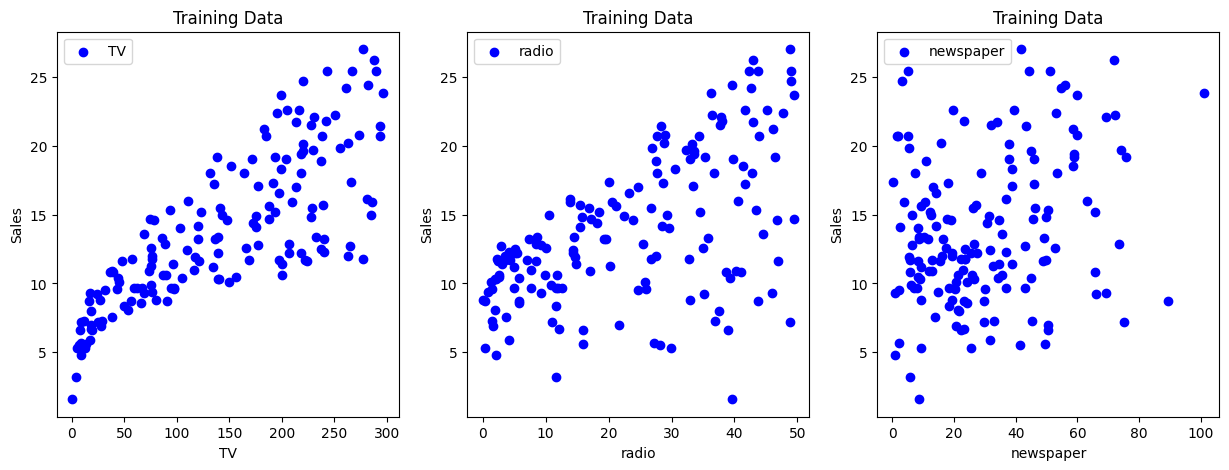

In [11]:
# Plot the relationship between sales and each feature (TV, radio, newspaper)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.scatter(X_train['TV'], y_train, color='blue', label='TV')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Training Data')
plt.legend()

plt.subplot(1,3,2)
plt.scatter(X_train['radio'], y_train, color='blue', label='radio')
plt.xlabel('radio')
plt.ylabel('Sales')
plt.title('Training Data')
plt.legend()

plt.subplot(1,3,3)
plt.scatter(X_train['newspaper'], y_train, color='blue', label='newspaper')
plt.xlabel('newspaper')
plt.ylabel('Sales')
plt.title('Training Data')
plt.legend()

plt.show()

In [39]:
# Investing 25k dollers for TV and radio advertising
model_sm.predict([1, 25, 25, 0])

array([8.5426332])

In [40]:
# Investing 50k dollers only for TV advertising
model_sm.predict([1, 50, 0, 0])

array([5.25010218])

In [12]:
# Investing 10k dollers only for radio advertising
model_sm.predict([1, 0, 50, 0])

array([11.83516421])